In [ ]:
%matplotlib inline

# Assignment 3

**DUE: Sunday November 6, 2022 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [ ]:
NAME = "Mahyar Vahabi"
STUDENT_ID = "1798645"

## Question 1 - Logistic Regression
---
In this question, you will build a system for predicting patient deaths in the Intensive Care Unit (ICU) using the large [PhysioNet Computing in Cardiology Challenge 2012 dataset](https://physionet.org/content/challenge-2012/1.0.0/). For each patient in the dataset, demographic variables and time series of physiological variables were collected during their stay in the ICU. 

The risk prediction system you will build could in principle be used to flag patients as being at risk of death so that physicians could intervene and improve their outcome. To be confident about the impact of such a system, you would need to run an experiment. In this question, you will use a model in order to estimate the potential impact of the system.

The data you will be working with is all available from [PhysioNet](https://physionet.org/challenge/2012/). You will be looking at only the data in "Training set A". The patient data files are [https://archive.physionet.org/challenge/2012/set-a.zip](here), and the outcomes file is [https://archive.physionet.org/challenge/2012/Outcomes-a.txt](here).





#### Downloading and Reading in the Data

First, we download the physiological data and read in patient outcomes file (links above).

We want this data to be read from text files and assembled into a dataframe. To do so, please run the following code which will first define a function that reads a text file, and then runs that function on all the files and assembles the outputs into a single dataframe.

#### Downloading the data

In [ ]:
!wget https://archive.physionet.org/challenge/2012/set-a.zip -O ./set-a.zip
import zipfile
with zipfile.ZipFile('./set-a.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

--2022-11-07 07:42:41--  https://archive.physionet.org/challenge/2012/set-a.zip
Resolving archive.physionet.org (archive.physionet.org)... 128.30.30.88
Connecting to archive.physionet.org (archive.physionet.org)|128.30.30.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7938449 (7.6M) [application/zip]
Saving to: ‘./set-a.zip’

./set-a.zip         100%[===================>]   7.57M  9.81MB/s    in 0.8s    

2022-11-07 07:42:42 (9.81 MB/s) - ‘./set-a.zip’ saved [7938449/7938449]



#### Reading in data

In [ ]:
import pandas as pd
import numpy as np
import glob

def comp_patient(patdat, attrs):
    patdat[patdat == -1.0] = float('NaN')
    patdat_dict = {}
    for attr in attrs:
        patdat_dict[attr] = [patdat["Value"][patdat["Parameter"]==attr].mean(axis = 0)]
    return patdat_dict


attrs = ["Age", "Gender", "Height", "Weight", "Urine", 
         "HR", "Temp", "NIDiasABP", "SysABP", "DiasABP", "pH",
         "PaCO2", "PaO2", "Platelets", "MAP", "K", "Na", "FiO2", "GCS", "RecordID"]


full_dat  = pd.DataFrame(columns = attrs)

# Now let's take the list "all_pat_dat" and assemble it into a dataframe.
filenames = sorted(glob.glob("/content/set-a/*.txt"))
for filename in filenames:
    data = open(filename)
    patient_dat_full = pd.read_csv(data, delimiter=',')
    patient_dat = pd.DataFrame.from_dict(comp_patient(patient_dat_full, attrs))
    full_dat = full_dat.append(patient_dat)

outcome_dat = pd.read_csv("https://archive.physionet.org/challenge/2012/Outcomes-a.txt")
outcome_dat[outcome_dat == -1] = float('NaN') # set all -1 to NaNs
full_dat_out = full_dat.merge(outcome_dat, left_on='RecordID', right_on='RecordID')
full_dat_out.replace([np.inf, -np.inf], np.nan)

col_means = full_dat_out.mean()
# Set everything that's NaN to the mean of that column:

# Note: we do this for simplicity. Strictly speaking, you should
# only use the training set to compute the column means

for i in range(full_dat_out.shape[1]):
    mask = np.isnan(np.array(full_dat_out.iloc[:,i]))
    full_dat_out.iloc[mask, i] = col_means[i]

In [ ]:
full_dat

,Age,Gender,Height,Weight,Urine,HR,Temp,NIDiasABP,SysABP,DiasABP,pH,PaCO2,PaO2,Platelets,MAP,K,Na,FiO2,GCS,RecordID
0,54.0,0.0,NaN,NaN,171.052632,70.810811,37.357143,50.147059,NaN,NaN,NaN,NaN,NaN,203.000000,NaN,4.20,136.500000,NaN,14.923077,132539.0
0,76.0,1.0,175.3,80.670588,151.560976,80.794118,36.939130,56.714286,113.411765,58.897059,7.395000,38.857143,210.142857,178.600000,76.940299,3.90,137.000000,0.560000,13.333333,132540.0
0,44.0,0.0,NaN,56.700000,124.951220,83.759259,37.800000,79.000000,125.687500,67.125000,7.495000,35.500000,134.500000,89.666667,90.437500,4.26,138.333333,0.500000,5.923077,132541.0
0,68.0,1.0,180.3,84.600000,545.833333,70.983333,36.223077,65.051724,NaN,NaN,NaN,NaN,NaN,330.000000,NaN,4.00,139.333333,NaN,14.944444,132543.0
0,88.0,0.0,NaN,NaN,62.131579,74.958333,36.880000,45.720930,NaN,NaN,NaN,NaN,NaN,103.000000,NaN,4.32,139.500000,NaN,15.000000,132545.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,70.0,0.0,NaN,87.000000,50.769231,99.230769,37.004762,62.966667,117.230769,68.865385,7.381429,40.428571,141.285714,208.000000,86.865385,3.70,136.666667,0.442857,13.071429,142665.0
0,25.0,1.0,NaN,166.400000,584.375000,79.136364,36.580000,58.409091,NaN,NaN,NaN,NaN,NaN,130.333333,NaN,3.72,140.200000,NaN,15.000000,142667.0
0,44.0,1.0,NaN,109.000000,116.472222,97.884615,37.792308,60.804348,125.666667,74.166667,7.396667,42.000000,149.000000,225.000000,89.666667,3.80,140.250000,0.412500,6.166667,142670.0
0,37.0,1.0,NaN,87.400000,11.230769,88.461538,38.418182,NaN,166.615385,92.923077,7.416000,44.200000,175.600000,325.750000,115.730769,4.65,144.000000,0.533333,5.625000,142671.0


In [ ]:
full_dat_out

,Age,Gender,Height,Weight,Urine,HR,Temp,NIDiasABP,SysABP,DiasABP,...,K,Na,FiO2,GCS,RecordID,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,54.0,0.0,169.787227,83.043044,171.052632,70.810811,37.357143,50.147059,118.591225,59.543420,...,4.20,136.500000,0.549199,14.923077,132539.0,6.0,1.0,5.0,351.063772,0.0
1,76.0,1.0,175.300000,80.670588,151.560976,80.794118,36.939130,56.714286,113.411765,58.897059,...,3.90,137.000000,0.560000,13.333333,132540.0,16.0,8.0,8.0,351.063772,0.0
2,44.0,0.0,169.787227,56.700000,124.951220,83.759259,37.800000,79.000000,125.687500,67.125000,...,4.26,138.333333,0.500000,5.923077,132541.0,21.0,11.0,19.0,351.063772,0.0
3,68.0,1.0,180.300000,84.600000,545.833333,70.983333,36.223077,65.051724,118.591225,59.543420,...,4.00,139.333333,0.549199,14.944444,132543.0,7.0,1.0,9.0,575.000000,0.0
4,88.0,0.0,169.787227,83.043044,62.131579,74.958333,36.880000,45.720930,118.591225,59.543420,...,4.32,139.500000,0.549199,15.000000,132545.0,17.0,2.0,4.0,918.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,70.0,0.0,169.787227,87.000000,50.769231,99.230769,37.004762,62.966667,117.230769,68.865385,...,3.70,136.666667,0.442857,13.071429,142665.0,19.0,7.0,10.0,336.000000,0.0
3996,25.0,1.0,169.787227,166.400000,584.375000,79.136364,36.580000,58.409091,118.591225,59.543420,...,3.72,140.200000,0.549199,15.000000,142667.0,8.0,2.0,3.0,351.063772,0.0
3997,44.0,1.0,169.787227,109.000000,116.472222,97.884615,37.792308,60.804348,125.666667,74.166667,...,3.80,140.250000,0.412500,6.166667,142670.0,8.0,5.0,11.0,351.063772,0.0
3998,37.0,1.0,169.787227,87.400000,11.230769,88.461538,38.418182,57.351445,166.615385,92.923077,...,4.65,144.000000,0.533333,5.625000,142671.0,22.0,10.0,8.0,7.000000,1.0


In [ ]:
def standardize_col(col):
    return (col - col.mean()) / col.std()

In [ ]:
full_dat_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                4000 non-null   float64
 1   Gender             4000 non-null   float64
 2   Height             4000 non-null   float64
 3   Weight             4000 non-null   float64
 4   Urine              4000 non-null   float64
 5   HR                 4000 non-null   float64
 6   Temp               4000 non-null   float64
 7   NIDiasABP          4000 non-null   float64
 8   SysABP             4000 non-null   float64
 9   DiasABP            4000 non-null   float64
 10  pH                 4000 non-null   float64
 11  PaCO2              4000 non-null   float64
 12  PaO2               4000 non-null   float64
 13  Platelets          4000 non-null   float64
 14  MAP                4000 non-null   float64
 15  K                  4000 non-null   float64
 16  Na                 4000 

### a) Understanding the Data (2 points)
Looking at the files and the code provided above, explain:


*   What is the size of your input data? how many parameters exist in the data?
*   Exaplain what the code provided above is trying to achieve.



We have 25 parameters, before the data cleaning we had 4000 inputs and after data cleaning we ended up with 3635. 

The code is reading a csv file, and read the TXT file and combine them and save in the data frame. Then we set all the -1 value to the mean of the value, merge the full_dat frame with record_ids and add it to a new data frame called full_dat_out

### b) Run Logistic Regression (9 points)


Divide your data into training, validation, and test sets (60-20-20). 

Use the features `HR`, `Gender`, `age`, `temperature`, `weight`, `height`, `PaO2`, and  `PaCO2`, and fit a logistic regression model to predict in-hospital death. 

In [ ]:
#clean data
feat = ['HR', 'Gender', 'Age', 'Temp', 'Weight', 'Height', 'PaO2', 'PaCO2']
full_dat_out.dropna(inplace=True)
for i in full_dat_out:
    if i in feat:
        full_dat_out = full_dat_out.loc[full_dat_out[i] > (full_dat_out[i].mean()-full_dat_out[i].std()*4)]
        full_dat_out = full_dat_out.loc[full_dat_out[i] < (full_dat_out[i].mean()+full_dat_out[i].std()*4)]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing
from sklearn import utils

X = full_dat_out.iloc[:,0] # Create vector of explanatory variables
y = full_dat_out.iloc[:,1] # Create vector of target variables

# Cast dataframes into numpy arrays
X = X.values
y = y.values

# Split data into X_train, Y_train, X_val, y_val, X_test y_test using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25)

train_index = np.argsort( X_train )
test_index = np.argsort( X_test )
val_index = np.argsort( X_val )

np.take_along_axis( y_train , train_index, axis = 0)
np.take_along_axis( y_test , test_index, axis = 0)
np.take_along_axis( y_val , val_index, axis = 0)

np.sort(X_train)
np.sort(X_test)
np.sort(X_val)

# Reshape X_train, X_test for sklearn LinearRegression
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
X_val = X_val.reshape(-1, 1)

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

# Regression
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_transformed)
full_dat_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3886 non-null   float64
 1   Gender             3886 non-null   float64
 2   Height             3886 non-null   float64
 3   Weight             3886 non-null   float64
 4   Urine              3886 non-null   float64
 5   HR                 3886 non-null   float64
 6   Temp               3886 non-null   float64
 7   NIDiasABP          3886 non-null   float64
 8   SysABP             3886 non-null   float64
 9   DiasABP            3886 non-null   float64
 10  pH                 3886 non-null   float64
 11  PaCO2              3886 non-null   float64
 12  PaO2               3886 non-null   float64
 13  Platelets          3886 non-null   float64
 14  MAP                3886 non-null   float64
 15  K                  3886 non-null   float64
 16  Na                 3886 

### c) ROC Curve (10 points)

Write a function that, for a given threshold (prob. threshold), calculates both the False Positive Rate (proportion of non-deaths identified as deaths by the model) and True Positive Rate (proportion of deaths correctly identified as such by the model) for your regression model. 

For 100 threshold values equally spaced from 0 to 1, plot the True Positive Rate vs. the False Positive Rate. Use the validation set.

This plot is known as an ROC curve. 


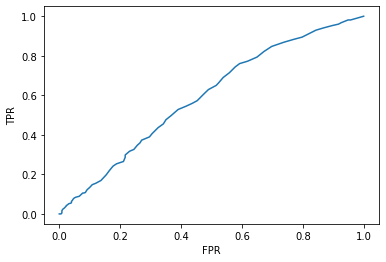

In [ ]:
### YOUR CODE HERE ###
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred = reg.predict_proba(X_val)[::,1]
y_true = []
y_score = []
for i in range(len(y_val)):
    if y_val[i] >= 0.5:
        y_true.append(1)
    else:
        y_true.append(0)
    y_score.append(y_pred[i])

fpr, tpr, _ = metrics.roc_curve(y_true,  y_score)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

### d) Interpreting the ROC Curve (4 points)

Using the plot generated in Part (c), what is the False Positive Rate associated with correctly identifying 80% of patients at risk for death in the ICU? Why might a high false positive rate be appropriate in this setting? You can read the answer off the ROC curve plot.


[The rate of False Positive cases that associates with correctly identifying 80 percent of patients at risk of death is about 0.7; it is better to have such high rating just in case the person is not sick, but the test inaccurately reports that they are so overclassifying in the risk of death category cana perhaps means extra precussion for more patients.]


### e) Modelling Doctors' Decision-Making (6 points)

For this part, produce a short report that answers all the questions below. Include code that produces the numbers that you need.

At the beginning of their shift, a doctor reviews their patients' charts, and decides what intervention is needed for each patient. In the following parts, we will be trying to improve this process. We will consider a simplified version of what is going on. Suppose that if the doctor intervenes correctly, the patient will not die; suppose that the doctor has 60 minutes to look through 25 patient charts; and suppose that the probability of missing the correct treatment if the doctor spends $t$ minutes on reviewing a file is

$$P(\textrm{fail}) = \exp(-t^2/100).$$


1. If the doctor reviews all the files, spends an equal amount of time on each chart, and there are 10 patients who will die without the correct intervention, how many patients are expected to die, if the doctor intervenes when they see that that's needed? What is the percentage of patients who are expected to die, out of 25?

2. Suppose now that the doctor is looking through all the patient charts in the validation set. They would have proportionately more time: $(N/25)\times 60$ minutes in total (where $N$ is the total number of patients in the set). How many patients would be expected to die, if the doctor intervenes correctly when they know they should do that?

3. Now, suppose that the doctor only reviews the files of patients for whom the model outputs a probability of greater than $20\%$. This would give the doctor more time to look through each file, but the doctor would never be able to intervene in the cases of patients form whom the output is $20\%$ or smaller. How many patients would be expected to die?



1. Given that the doctor takes an equal amount of time (2.4 minutes) to review 25 patients' charts, we plug it in the P(fail) function which gives us roughly 0.944 probability of failed treatment. We multuply that by 10 to get the number of patients expected to die (**9.44 people**) which is equivalent to **37.76%** of the 25 people total that are dying. 

2. Its the same time ratio per patient which is 2.4 minutes, so if we were to take the number of patients who are sick (otherwise categorized as 1 on the y_validation set which equals 106) and multiply it by the same exact probability of failure (0.944), we would get 101.01 people who will die.

3. 123 people are expected to die out of the 777 people that are in the validation set, given the 144 people that were above the threshold of 0.2.

In [ ]:
import math as m
# problem 1
t = 60/25 # 60 minutes given per 25 patients 
print("probability of failure for 10 people:", m.exp(-pow(t, 2)/100))
# problem 2
N = len(X_val) # number of patients in the validation set (20% of total set)
x = m.floor(np.count_nonzero(y_val)/4.10)
print(x)
print("Expected number of patients to die is:", 107 * m.exp(-pow(t, 2)/100))
y_val_pred_props = reg.predict_proba(X_val)[::,1]


probability of failure for 10 people: 0.9440274829178357
103
Expected number of patients to die is: 101.01094067220842


### f) Modelling Doctors' Decision-Making - Revisited (7 points)


In this Part, you will explore the policy implications of using our model in an understaffed hospital. 

Suppose that we are considering a policy of only reviewing the files of patients whose probability of death is above a threshold `thr`. Each chart would be given an equal amount of time, and the total amount of time will be $(N/25)\times 60$.

Using the model from previous part, plot the total number of expected deaths under the policy vs. the threshold. Using the plot, what is the best threshold to use that would minimize the number of deaths?

You should compute the expected number of deaths for the thresholds `np.arange(0, 1, 0.01)`.

Use the validation set.




In [ ]:
np.arange(0, 1, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

[It seems that with this np arange, our threshold of 0.2 allows the minimum chances of having death cases. The ones that were below 20 percent are most likely surviving and not sick (false positives perhaps), so the ones above that line who also have that 0.944 probability of having inccorect treatments are much needed to be taken care of.]

### g) Modelling Doctors' Decision-Making - Testing (7 points)

On the test set, compare the total number of expected deaths under the best policy that was selected in Part (f) to reviewing each patient's file. In relative terms (i.e., as a percentage), how many lives would be saved, if the assumptions underlying our simulation are accurate?

For the test case (same size as validation) we might say we save 777-123 = **654** people that we can save, given that our model is accurately portrayed.

## Question 2 - Neural Networks
---

We will train a fully connected neural networks to recognize face images of cats and dogs. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [ ]:
data_dir = 'pets'
image_width = 32
image_height = 32
batch_size = 10

### a) Load the Pets Dataset (2 points)
There are 110 images of size $32\times32$. Run the following code block to import the data. Keep in mind that they will be downloaded from the internet, so it may take a while.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download the data
downloaded = drive.CreateFile({'id':"1NXiYkupBcolg90e6wE_Nm_F9VTFoXIja"})
downloaded.GetContentFile('pets.npy')  
data = np.load("pets.npy",allow_pickle=True)

In [ ]:
# Create X and y
X, y = (data[()]['X'], data[()]['y'])

In [ ]:
# Get class names and create ID
class_names = ['cat', 'dog']
class_dict = {i:class_name for i,class_name in enumerate(class_names)}

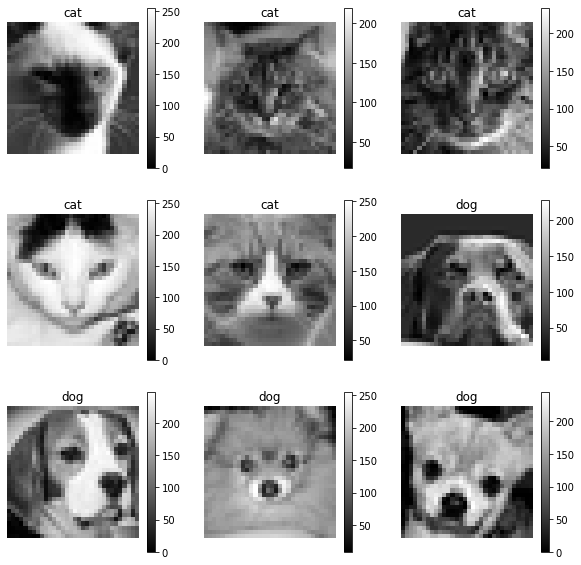

In [ ]:
# Plot some images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for count, i in enumerate(range(0,110, 13)):
    ax = plt.subplot(3, 3, count + 1)
    plt.imshow(X[i],cmap='gray')
    plt.colorbar()
    plt.title(class_names[y[i]])
    plt.axis("off")

Answer the following questions:

1.) What are the data types for X and y?

2.) What are the shapes of X and y?

3.) What is the minimum and maximum value of X?

1. They both are numpy arrays
2. Theres 110 arrays of 32 by 32 for x and 110 dimensions for y
3. min = 0, max = 255


In [ ]:
print(type(X), type(y))
print(X.shape, y.shape)
print(X.min(), X.max())

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(110, 32, 32) (110,)
0 255


### b) Data Preprocessing (3 points)
As you can see above, the pixel values are in the [0,255]. This is the normal range for images. Recall from the previous lectures and excercises that we need to normalize our data.

In order to normalize our data to [0,1] we use the equation:

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In our case we can assume that $x_{min}=0$ and $x_{max}=255$, this is a safe assumption since we are working with image data.

This means that for image data, if we want to normlize to [0,1] the equation simplifies to:

$$img_{norm}=\frac{img}{255}$$

Anytime you work with image data in any kind of model you will be normalizing with this equation. Unless the range you want to normalize is different. Sometimes you want to normalize between [-1,1], for that you would use a slightly different equation.


Normalize the X data using the above equation and save as train_images.

In [ ]:
train_images =  X/255

If we show the image agian, you will see the values are all scaled correctly.

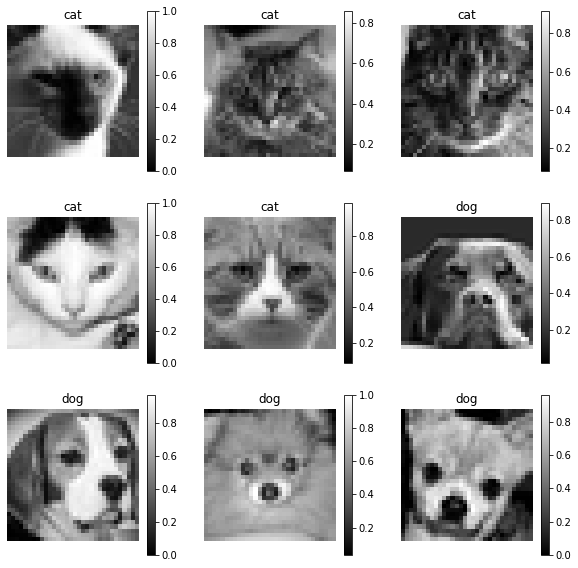

In [ ]:
# Plot images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for count, i in enumerate(range(0,110, 13)):
    ax = plt.subplot(3, 3, count + 1)
    plt.imshow(train_images[i],cmap='gray')
    plt.colorbar()
    plt.title(class_names[y[i]])
    plt.axis("off")

What is the new minimum and maximum value of X?

min = 0.0, max = 1.0

In [ ]:
print(train_images.min(), train_images.max())

0.0 1.0


### c) Reshaping the Data (5 points)

Please reshpe training images to be 1024-dim (from $32 \times 32$). 

Hint: look into numpy.reshape().


In [ ]:
print(f'Before reshape, train_images shape: {train_images.shape}')

train_images = np.reshape(train_images, (110, 1024, ))

print(f'Before reshape, train_images shape: {train_images.shape}')


Before reshape, train_images shape: (110, 32, 32)
Before reshape, train_images shape: (110, 1024)


### d) Building a Simple Neural Network (15 points)
In the cell below, build a fully-connected feed-forward neural network with the following layers:
* **input layer** of shape 1024
* **hidden layer** with 25 neurons, and relu activation
* **output layer** with 1 neuron, and sigmoid activation

In [ ]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import *

# Build neural network
# YOUR CODE HERE

input_layer = Input(shape=(1024))
x = Dense(25, activation='relu')(input_layer)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_layer, x)


In [ ]:
# Show a summary of your model
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_9 (Dense)             (None, 25)                25625     
                                                                 
 dense_10 (Dense)            (None, 1)                 26        
                                                                 
Total params: 25,651
Trainable params: 25,651
Non-trainable params: 0
_________________________________________________________________


Declare the optimizer using Stochastic Gradient Descient with learning rate of 0.001, weight decay of 1e-6 and momentum of 0.009. Compile your model using the 'binary_crossentropy' loss function and 'accuracy' as the metrics.

In [ ]:
# Declare optimizer
optimizer =  tf.keras.optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.009)

# Compile model
model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Now we will train our model to learn pet faces using train_images and the 'y' labels. Our dataset is small so we will use 10% of the data as test set data. Train your model using the following parameters:

Fit your model using the train_images, 'y' labels, a batchsize of 10, and validation split of 0.1. Train for 500 epochs.

.fit documentation: https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [ ]:
y = y.reshape(-1,1)

# Call fit on your model passing in the X, y data above, train for 500 epochs
hist = model.fit(x=train_images, y=y, batch_size=10, validation_split=0.1, epochs=500)
# YOUR CODE HERE

In [ ]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

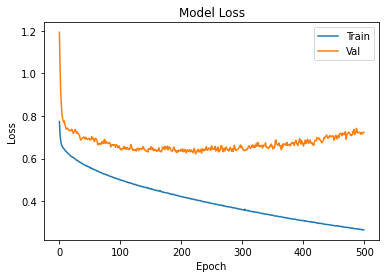

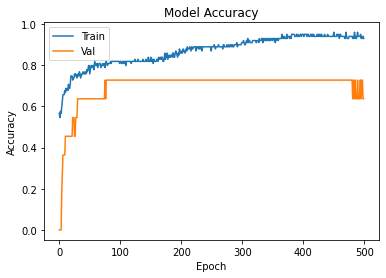

In [ ]:
# plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

For the input size, this one hidden layer neural network is probably too small. However, we can see that the model attempts to minimize the overall loss. Summarize your observations on the model's learning curves, model's overall classification accuracy on the validation set, and the least amount of loss on validation set?

It looks like the validation set has both the same overall classification accuracy and least amount of loss of around 0.7.

### e) Building a Second Neural Network (15 points)
Next, you will build a neural network with one hidden layer that is wider than the previous model's hidden layer. In the cell below, build a neural network with the following layers:
* **input layer** of shape 1024
* **hidden layer** with 100 neurons, and relu activation
* **output layer** with 1 neuron, and sigmoid activation

In [ ]:
# Build Neural network
# YOUR CODE HERE
input_layer = Input(shape=(1024))
x = Dense(100, activation='relu')(input_layer)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_layer, x)

In [ ]:
# Show a summary of your model
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_11 (Dense)            (None, 100)               102500    
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


Again, declare the optimizer using Stochastic Gradient Descient with learning rate of 0.001, weight decay of 1e-6 and momentum of 0.009. Compile your model using 'binary_crossentropy' loss function and 'accuracy' as the metrics.

In [ ]:
# Declare optimizer
optimizer = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.009)
# YOUR CODE HERE

# Compile model
# YOUR CODE HERE
model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In this sell fit your model using the train images, y labels, a batchsize of 10, and validation split of 0.1. Train for 500 epochs.

In [ ]:
y = y.reshape(-1,1)

# Call fit on your model passing in the X, y data above, train for 500 epochs
hist = model.fit(x=train_images, y=y, batch_size=10, validation_split=0.1, epochs=500)

# YOUR CODE HERE

In [ ]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

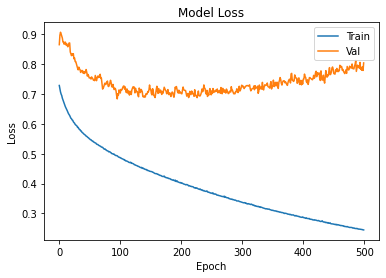

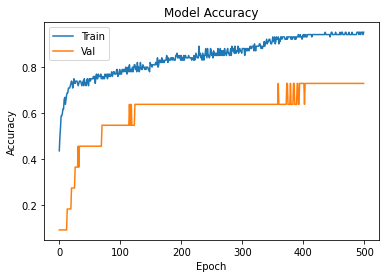

In [ ]:
# Plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

eNext, summarize this models results. Consider the following questions when answering. Remember that this model has a higher learning capacity than the previous model. 

1) How did this model compare to previous model? 

2) Did it outperform the previous models? 

3) What was your model's overall classification accuracy on the validation set and the least amount of loss on validation set? 

1. In terms of the accuracy rate goes, this model tool a slower time to reach its convergence at around 0.6, where as the first model was much faster in minimizing towards 0.7 rate accuracy. In addition the training sets and the validation sets had a similar convergence on both losses and accuracy rates.
2. This is a hard question to answer because each time I restarted my runtime, the model accucarcy kept changing and sometimes it was better and sometimes it was worse than the first model. But If i have to guess, the first model did slighlt better than this model perhaps because we gave it higher unit.
3. Overall classification accuracy on the validation converged slightly above 0.6 and least amount of loss was 0.7. 

### f) Building a Third Neural Network (15 points)
Lastly, you will build a fully-connected neural network with two hidden layers. In the cell below, build a neural network with the following layers:
* **input layer** of shape 1024
* **hidden layer** with 100 neurons, and relu activation
* **hidden layer** with 25 neurons, and relu activation
* **output layer** with 1 neuron, and sigmoid activation

In [ ]:
from tensorflow.keras.layers import Input, Dense # only use these layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import * # you can use any optimizer

# Build Neural network
# YOUR CODE HERE
input_layer = Input(shape=(1024))
x = Dense(100, activation='relu')(input_layer)
x = Dense(25, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_layer, x)

In [ ]:
# Show a summary of your model
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_13 (Dense)            (None, 100)               102500    
                                                                 
 dense_14 (Dense)            (None, 25)                2525      
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 105,051
Trainable params: 105,051
Non-trainable params: 0
_________________________________________________________________


Since this model is bigger than the previous models, we will use a more powerful optimizer. Declare the optimizer as Adam with learning rate of 0.001. Compile your model using 'binary_crossentropy' loss function and 'accuracy' as the metrics.

In [ ]:
# Declare optimizer
optimizer = tf.keras.optimizers.Adam(lr=0.001)
# YOUR CODE HERE

# Compile model
# YOUR CODE HERE
model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In this sell fit your model using the train images, y labels, a batchsize of 10, and validation split of 0.1. Train for 500 epochs.

In [ ]:
y = y.reshape(-1,1)

# Call fit on your model passing in the X, y. 
# Train for 500 epochs with a batch size of 10 and validation split of 0.1
hist = model.fit(x=train_images, y=y, batch_size=10, validation_split=0.1, epochs=500)

# YOUR CODE HERE

Epoch 1/500
10/10 [==============================] - 1s 20ms/step - loss: 0.7081 - accuracy: 0.5859 - val_loss: 0.6949 - val_accuracy: 0.5455
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6293 - accuracy: 0.6364 - val_loss: 0.7434 - val_accuracy: 0.3636
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5860 - accuracy: 0.6869 - val_loss: 0.9045 - val_accuracy: 0.1818
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 0.5626 - accuracy: 0.6869 - val_loss: 0.8829 - val_accuracy: 0.2727
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 0.5513 - accuracy: 0.7071 - val_loss: 0.9621 - val_accuracy: 0.2727
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.5816 - accuracy: 0.6970 - val_loss: 0.4393 - val_accuracy: 0.9091
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4812 - accuracy: 0.7677 - val_loss: 1.0037 - val_accuracy: 0.1818
Epoch 8/500


In [ ]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

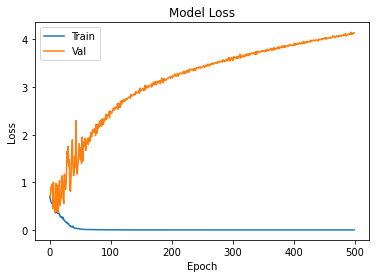

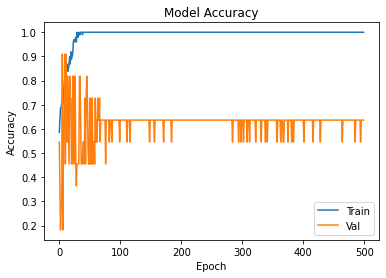

In [ ]:
# plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

Summarize this model's results. Consider the following when answering:

1) How did this model compare to previous models? 

2) Did it outperform the previous models? 

3) What was your model's overall classification accuracy on the validation set and the least amount of loss on validation set? 

4) Adam is a powerful optimizer, and may quickly converge to an a minima. Did this happen with this model?

1. Comparing our models to the previous one, the training sets accuracy was higher from the beginning epoch sizes and also was lower on the model loss. For the validation set, it quickly converged to a certain accuracy rate while on the previous model it was fluctuating a bit.  
2.  Yes it did outperform because of its fast minimization on the accuracy rating and its peak accuracy rating was also higher than the one before that.
3. The model's overall classification accuracy was around 0.65 even though every other time I ran the code it would be higher than 7 so I can not explain why this happens. Least amount of loss was 0.48.
4. Yes it did minimize to 0.65 pretty quick.